In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter

d:\python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# use terminal to download data from kaggle
 "kaggle datasets download tawfikelmetwally/automobile-dataset"

# DATA OVERVIEW:
    The dataset consists of the following columns:

    Name: Unique identifier for each automobile.
    MPG: Fuel efficiency measured in miles per gallon.
    Cylinders: Number of cylinders in the engine.
    Displacement: Engine displacement, indicating its size or capacity.
    Horsepower: Power output of the engine.
    Weight: Weight of the automobile.
    Acceleration: Capability to increase speed, measured in seconds.
    Model Year: Year of manufacture for the automobile model.
    Origin: Country or region of origin for each automobile.

In [ ]:
#!pip install kagglehub[pandas-datasets]


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import zipfile
with zipfile.ZipFile("D:/python/Machine_learning/DATA/automobile-dataset.zip", 'r') as zipref:
    zipref.extractall("DATA")
    

## Importing and checking Dataset

In [111]:
df = pd.read_csv("D:/python/Machine_learning/Linear_regression/DATA/Automobile.csv")
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [112]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    str    
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [113]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [114]:
#Filling missing values
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [115]:
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

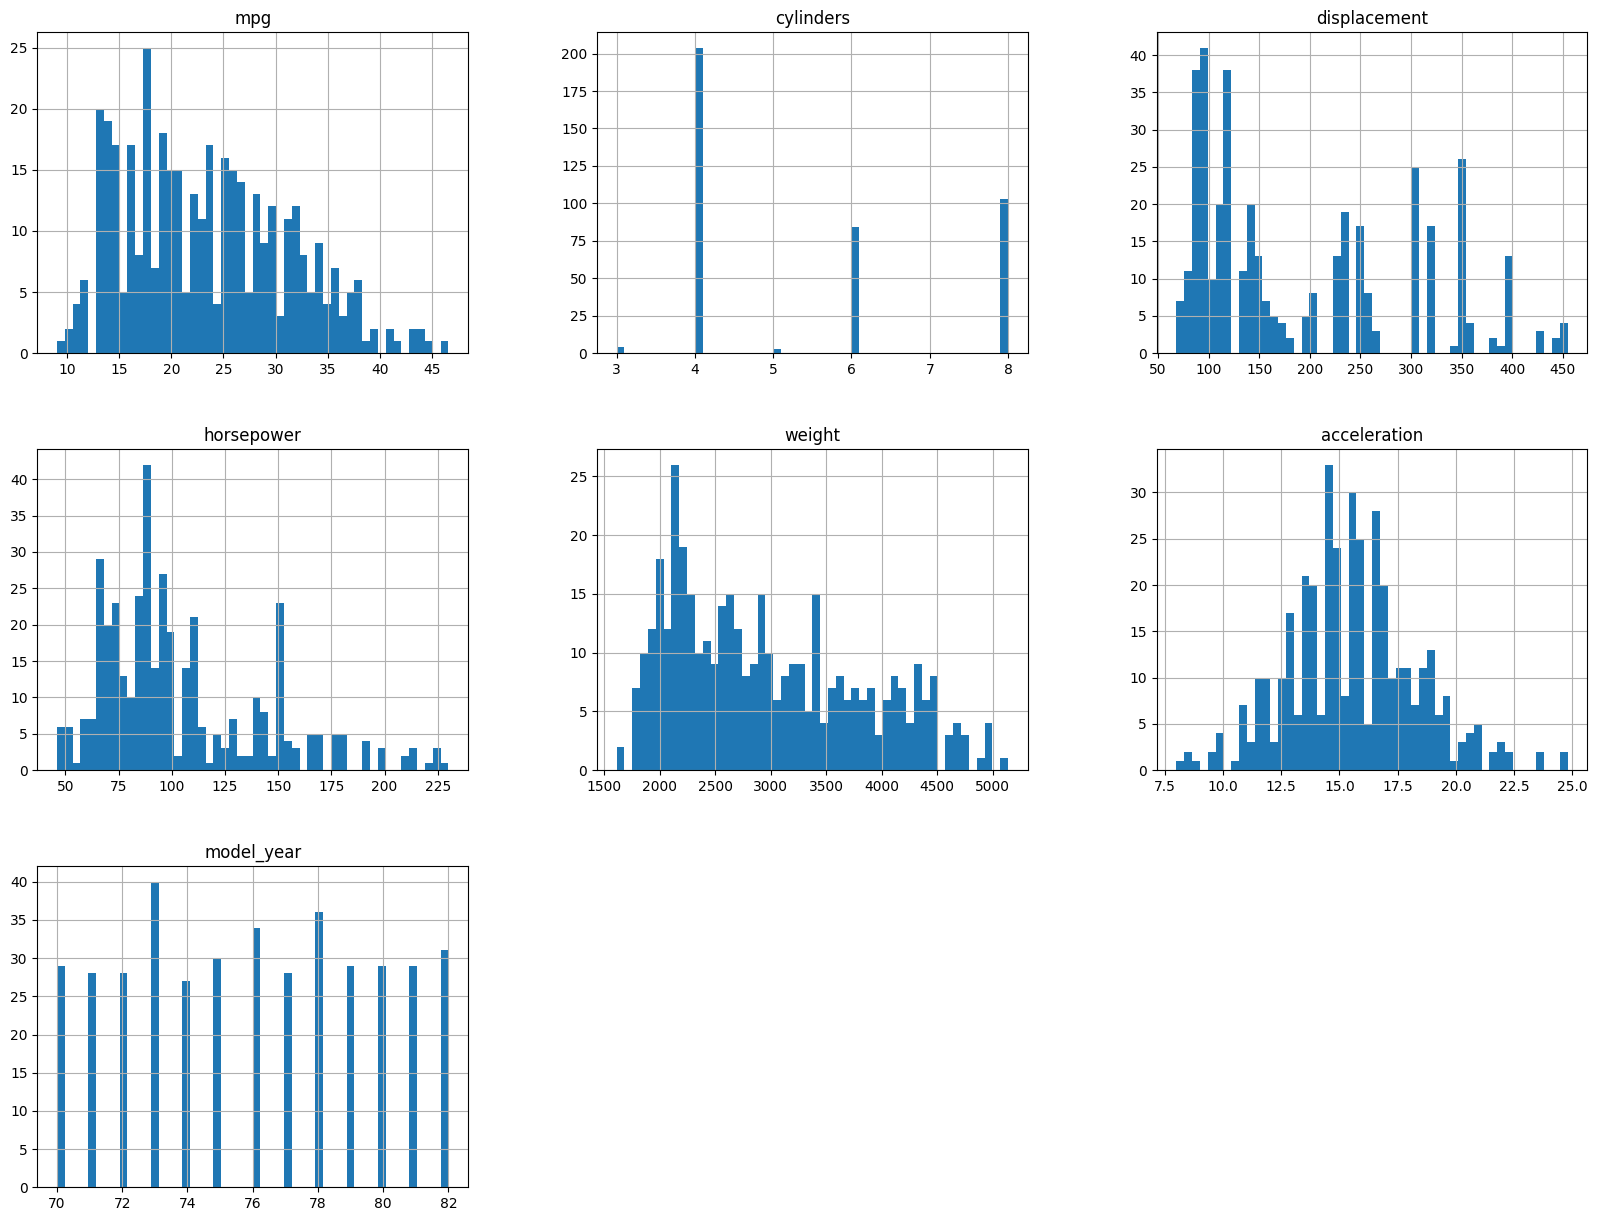

In [116]:
df.hist(bins=50,figsize=(20,15))

## Converting str values to int

In [117]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    str    
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    398 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [118]:
# since we are not dealing with name of car we are interested in car data to output mileage
df = df.drop('name', axis=1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [119]:
#Converting mpg column to KPL by dividing mpg column value by 2.352
df['mpg'] = df['mpg'].astype('float') / 2.352
df.rename(columns = {'mpg':'KPL'}, inplace=True)

In [120]:
df.head()

,KPL,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,7.653061,8,307.0,130.0,3504,12.0,70,usa
1,6.377551,8,350.0,165.0,3693,11.5,70,usa
2,7.653061,8,318.0,150.0,3436,11.0,70,usa
3,6.802721,8,304.0,150.0,3433,12.0,70,usa
4,7.227891,8,302.0,140.0,3449,10.5,70,usa


In [ ]:
df["KPL"] = df["KPL"].round(3)   # keep 2 decimals
df.head()

,KPL,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,7.653,8,307.0,130.0,3504,12.0,70,usa
1,6.378,8,350.0,165.0,3693,11.5,70,usa
2,7.653,8,318.0,150.0,3436,11.0,70,usa
3,6.803,8,304.0,150.0,3433,12.0,70,usa
4,7.228,8,302.0,140.0,3449,10.5,70,usa


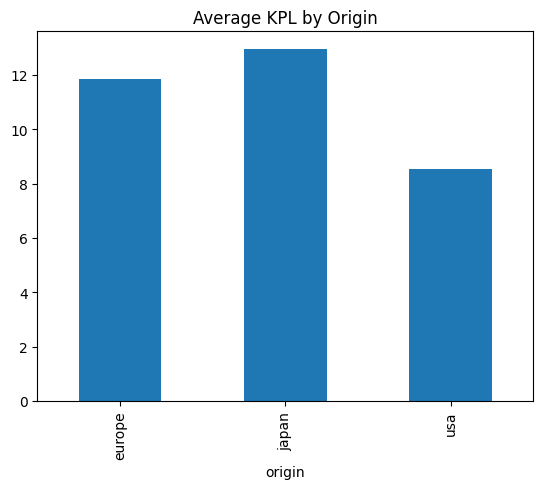

In [137]:
df.groupby('origin')['KPL'].mean().plot(kind = 'bar', title='Average KPL by Origin')
plt.show()


<Axes: >

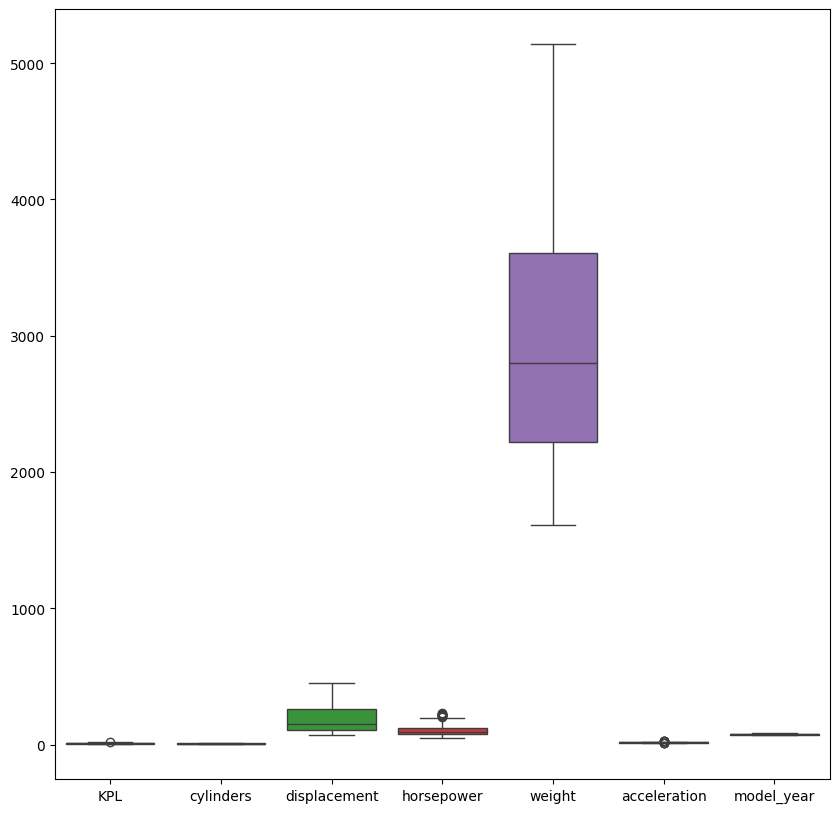

In [141]:
plt.figure(figsize=[10,10])
sns.boxplot(df)

In [146]:
#Changing the dtypes of dataset
for i in df.columns:
    df[i] = df[i].astype('float32')

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KPL           398 non-null    float32
 1   cylinders     398 non-null    float32
 2   displacement  398 non-null    float32
 3   horsepower    398 non-null    float32
 4   weight        398 non-null    float32
 5   acceleration  398 non-null    float32
 6   model_year    398 non-null    float32
dtypes: float32(7)
memory usage: 11.0 KB


<Axes: >

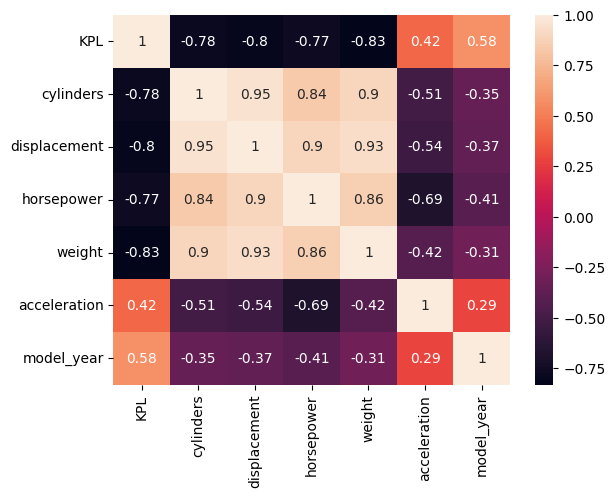

In [148]:
sns.heatmap(df.corr(), annot=True )

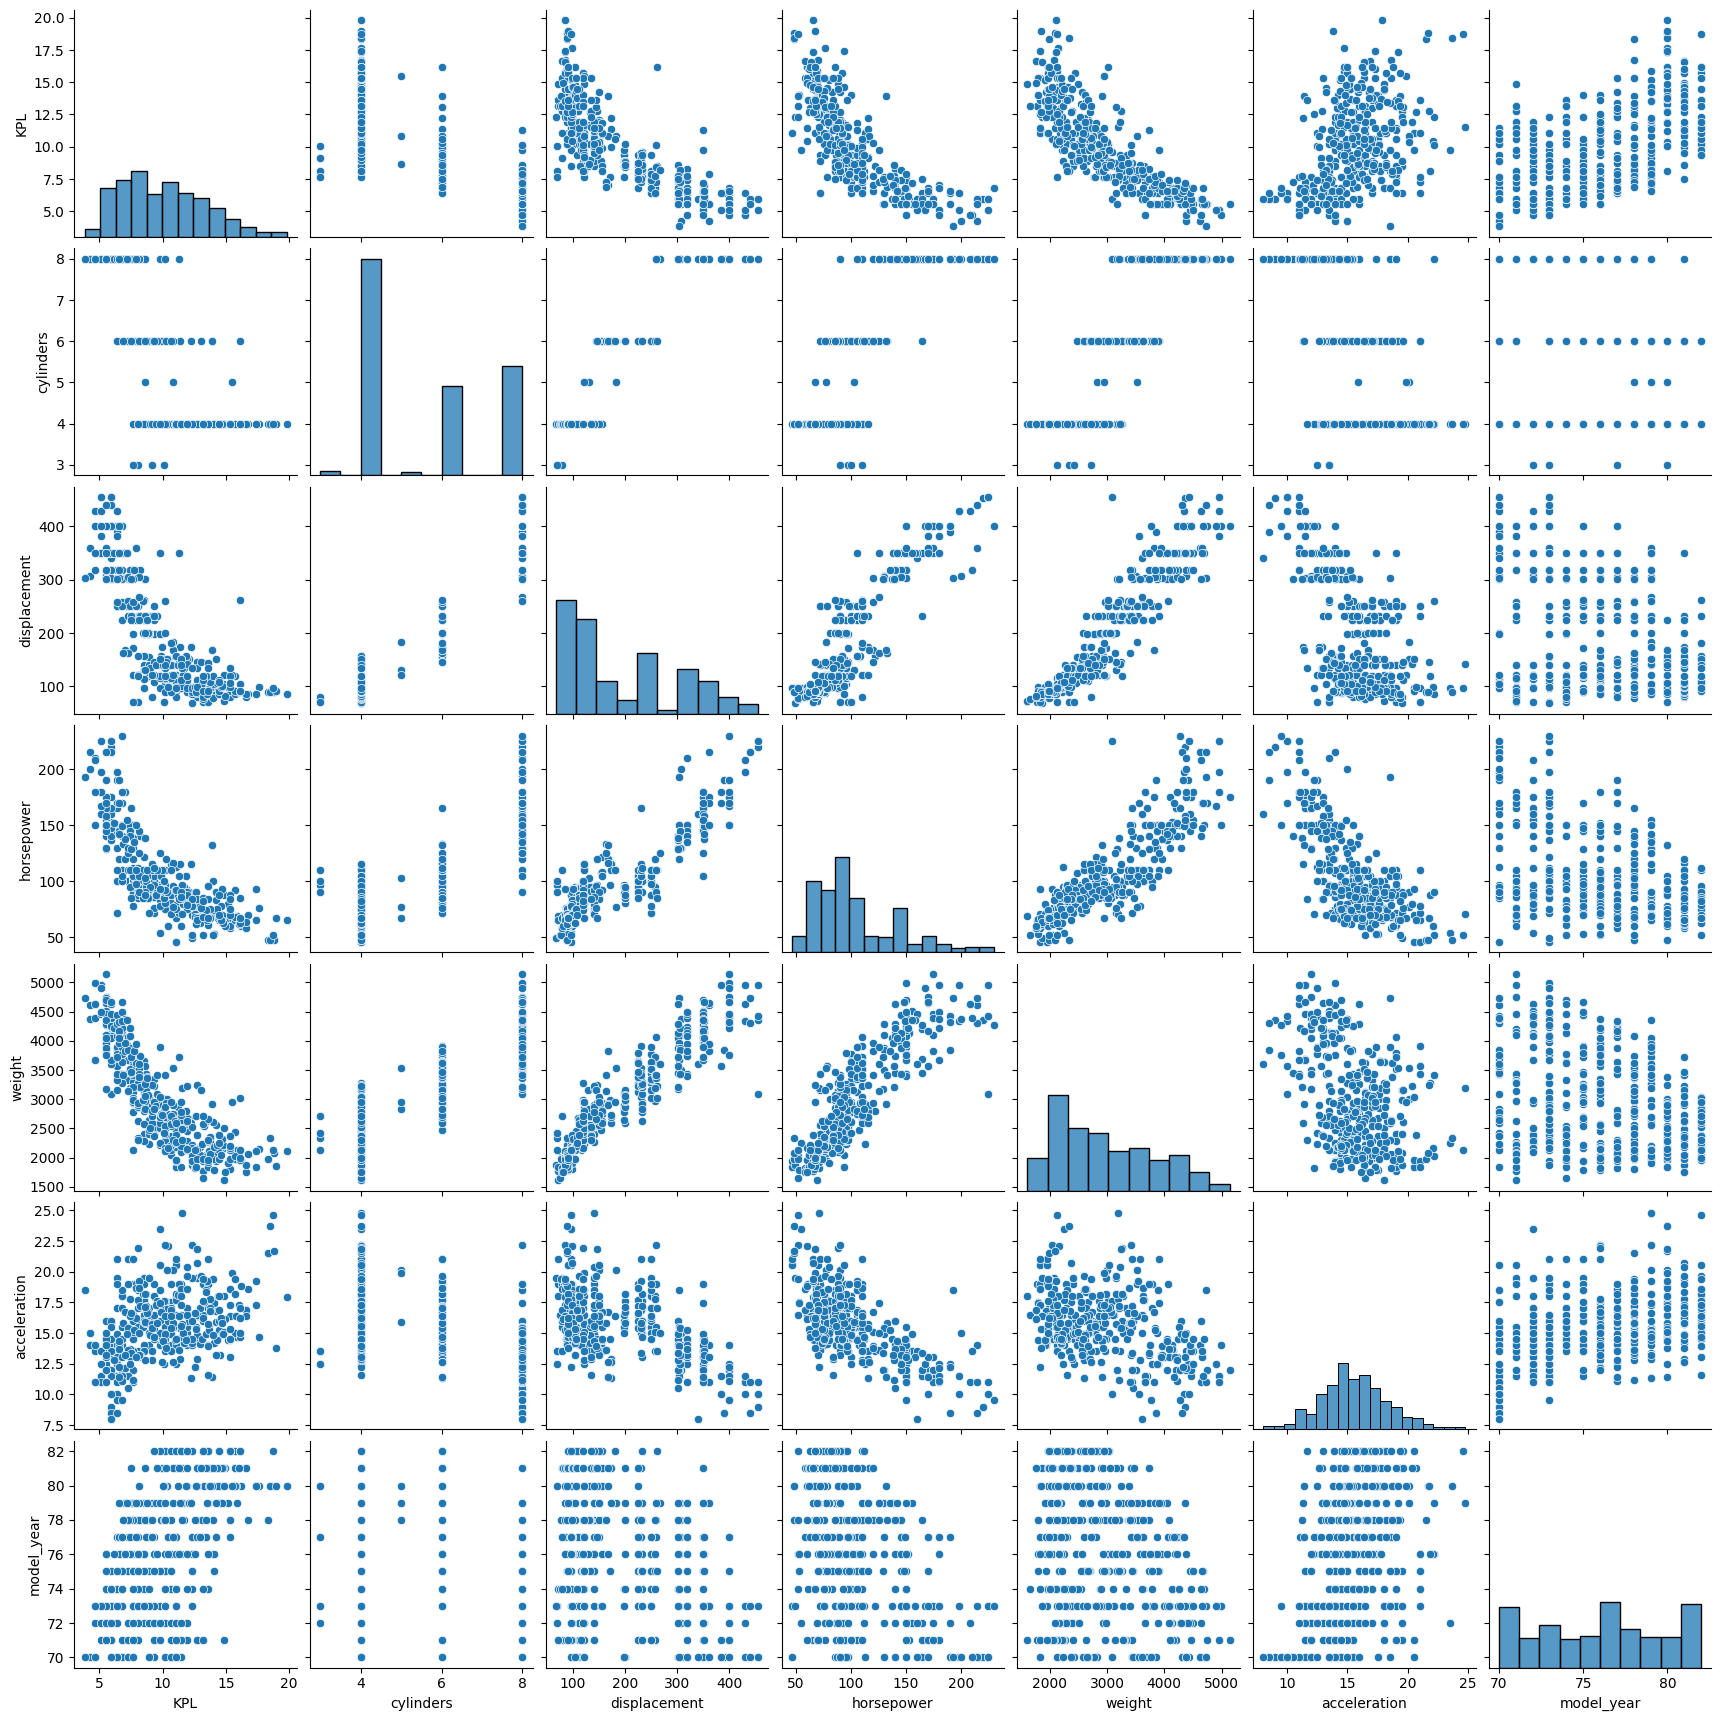

In [150]:
sns.pairplot(df)

## from above data our target variable KPL - kilometers Per Litre is impacted as follows:
    1. from no, of cylinders it is decreasing. 
    2. from increasing the horsepower of car, it is decreasing.
    3. from weight of car it is negatively impacted.
    4  It is positively impacted by the accelaration of a car.

## Data **Splitting**

In [151]:
X = df.drop("KPL", axis=1)
y = df["KPL"]

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling the data

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Choosing model

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Evaluating the model performance

In [168]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_log_error

In [169]:
pred = model.predict(X_test)
MAE = mean_absolute_error(y_test, pred)
RMSE = root_mean_squared_error(y_test, pred)
MSLE = mean_squared_log_error(y_test, pred)
r2_score = r2_score(y_test, pred)


In [171]:
print(f"Model evaluation score MAE: {MAE}, RMSE: {RMSE}, MSLE: {MSLE}, r2_score: {r2_score}")

Model evaluation score MAE: 1.0487762689590454, RMSE: 1.30629301071167, MSLE: 0.022850489243865013, r2_score: 0.8244271874427795
